In [33]:
import pandas as pd
import numpy as np
from collections import Counter
import plotly.express as px

In [8]:
datafolder = '../data/data-10k/'

In [10]:
titlebasics= 'title.basics-10k.tsv'

In [37]:
df= pd.read_csv(datafolder + titlebasics, sep='\t', quoting = 3)

In [120]:
from unidecode import unidecode

for col in df.columns :
    df["primaryTitle"] = df["primaryTitle"].apply(lambda x: unidecode(x))
    df["originalTitle"] = df["originalTitle"].apply(lambda x: unidecode(x))
    df["genres"] = df["genres"].apply(lambda x: unidecode(x))

df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [41]:
df["tconst"].nunique()

9999

In [73]:
df["titleType"].value_counts(normalize=True)


titleType
short    0.579358
movie    0.420642
Name: proportion, dtype: float64

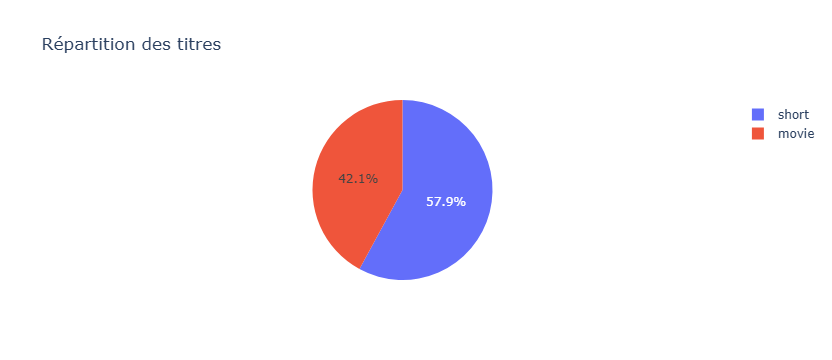

In [77]:
data = {'titleType': ['short', 'movie'], 'proportion': [0.579358, 0.420642]}
df_proportions = pd.DataFrame(data)

# Création du graphique
fig = px.pie(df_proportions, values='proportion', names='titleType', 
             title="Répartition des titres")
fig.show()


In [79]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [95]:
df[["primaryTitle" , "startYear", "runtimeMinutes"]].value_counts()

primaryTitle               startYear  runtimeMinutes
Mutt and Jeff              1913       \N                15
Hamlet                     1908       \N                 3
Devil Dogs                 1918       \N                 2
Lena Rivers                1914       \N                 2
Macbeth                    1909       \N                 2
                                                        ..
In the Palace of the King  1915       60                 1
In the Park                1915       14                 1
In the Prime of Life       1911       52                 1
In the Reign of Terror     1911       17                 1
Ålderdom och dårskap       1916       46                 1
Name: count, Length: 9971, dtype: int64

In [97]:
df["primaryTitle"]=="Mutt and Jeff"

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997    False
9998    False
Name: primaryTitle, Length: 9999, dtype: bool

In [103]:
duplicates = df[df[["primaryTitle", "startYear", "runtimeMinutes", "genres"]].duplicated(keep=False)]

duplicate_indices = duplicates.index.tolist()

print("\nLignes dupliquées :")
print(duplicates)



Lignes dupliquées :
         tconst titleType                     primaryTitle  \
276   tt0000279     short  Buffalo Bill's Wild West Parade   
277   tt0000280     short  Buffalo Bill's Wild West Parade   
626   tt0000631     short                           Hamlet   
939   tt0000950     short                          Macbeth   
1230  tt0001242     short                           Hamlet   
1287  tt0001299     short                          Macbeth   
2378  tt0002405     movie                     Oliver Twist   
2379  tt0002406     movie                     Oliver Twist   
3110  tt0003139     movie             Mexican War Pictures   
3111  tt0003140     movie             Mexican War Pictures   
3151  tt0003180     short                    Mutt and Jeff   
3152  tt0003181     short                    Mutt and Jeff   
3153  tt0003182     short                    Mutt and Jeff   
3154  tt0003183     short                    Mutt and Jeff   
3155  tt0003184     short                    Mutt

In [109]:
df = df.drop_duplicates(subset=["primaryTitle", "startYear", "runtimeMinutes", "genres"])
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [113]:
df["tconst"].nunique()

9975